# Financial Derivatives Group Project (35 points of final grade)
In this assignment, you will have to answer questions by adding codes or markdowns in the cells provided.

In [2]:
! pip install numpy matplotlib scipy pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### Question 1: simulate price path using the geometric Brownian motion [2 points]

The logarithm stock price under the geometric Brownian motion is given by:

$ S_{t} = S_{0}e^{(\mu - \frac{1}{2}\sigma^{2})t + \sigma{\epsilon\sqrt{t}}} $

where $\epsilon \sim \mathcal{N}(0,1)$.

Using the following parameters:

$ \mu = 0.1 $

$ N = 100 $

$ T = 10 $

$ dt = 10/100 = 0.1 $

$ S_0 = 100 $

**Simulate** price paths for $\sigma = 0, \sigma = 0.1, \sigma = 0.2$ using a random seed of 5 and *plot them on a diagram.

**Answer in the box below:**

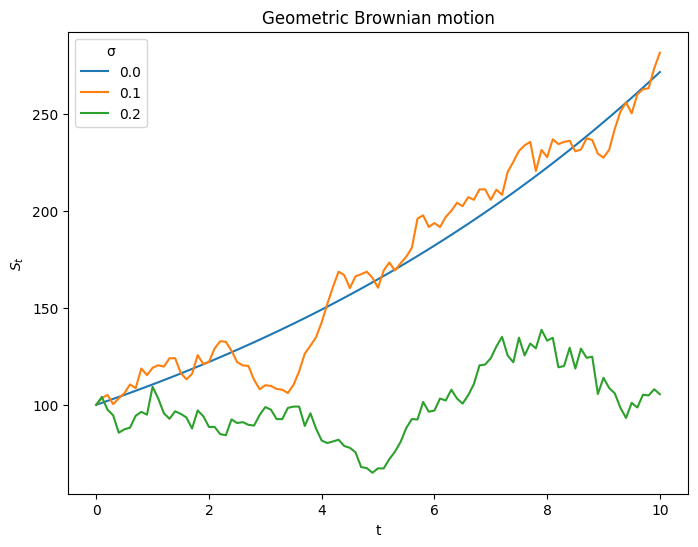

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
np.random.seed(5)
mu = 0.1
N = 100
T = 10
dt = T / N
S0 = 100

# Time vector
t = np.linspace(0, T, N+1)

# Define the sigmas to simulate
sigmas = [0.0, 0.1, 0.2]

plt.figure(figsize=(8,6))

for sigma in sigmas:
    # Generate standard normal random variables
    eps = np.random.randn(N)
    # Initialize the price array
    S = np.zeros(N+1)
    S[0] = S0

    # Simulate the price path
    for i in range(1, N+1):
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2)*dt + sigma * eps[i-1] * np.sqrt(dt))

    plt.plot(t, S, label=f"{sigma}")

plt.title("Geometric Brownian motion")
plt.xlabel("t")
plt.ylabel("$S_t$")
plt.legend(title="σ")
plt.show()


You should replicate the diagram below:
<img src="gbm.png">

### Question 2: applying the Itô's lemma [2 points]

Given the following Itô process:

$ dX_{t} = dW_{t} $ 

Apply the **Itô's lemma** to the following function:

$ f(X) = e^{2X} $


**Please fill in your answers below:**

$ df(X_t) = \frac{\partial f}{\partial X} dX_t + \frac{1}{2} \frac{\partial^2 f}{\partial X^2} (dX_t)^2 $, where $ (dX_t)^2 = dt $ in an Itô process.


$  \frac{\partial f}{\partial X} = 2e^{2X}, \frac{\partial^2 f}{\partial X^2} = 4e^{2X} $

$ df(X_t) = 2e^{2X_t} dX_t + 2e^{2X_t} dt $

### Question 3: applying the Itô's product rule [2 points]

Given the following three Itô processes for asset $X$, asset $Y$, and asset $Z$ respectively:

$ dX_{t} = \mu_{x}X_{t}dt + \sigma_{x}X_{t}dW^{x}_{t} $

$ dY_{t} = \mu_{y}Y_{t}dt + \sigma_{y}Y_{t}dW^{y}_{t} $

$ dZ_{t} = \mu_{z}Z_{t}dt + \sigma_{z}Z_{t}dW^{z}_{t} $

where $ dW^{x}_{t} $,  $ dW^{y}_{t} $, and $ dW^{z}_{t} $ are Brownian motions for asset $X$, asset $Y$, and asset $Z$ respectively with correlations $ \rho_{x,y} $ between $X$ and $Y$,  $ \rho_{x,z} $ between $X$ and $Z$, and $ \rho_{y,z} $ between $Y$ and $Z$.

Find the **differential** for the following function:

$ f(X,Y,Z) = X_{t}(Y_{t} + Z_{t}) $

**Please fill in your answers below:**

### Solution to Question 3: Applying Itô's Product Rule

#### Step 1: Recall Itô's Product Rule
For two Itô processes $ X_t $ and $ Y_t $, the product rule is given by:
$
d(X_t Y_t) = X_t dY_t + Y_t dX_t + dX_t dY_t
$

Here, the process involves three variables $ X_t $, $ Y_t $, and $ Z_t $, so we will extend the rule to:

$
d(X_t (Y_t + Z_t)) = (Y_t + Z_t) dX_t + X_t d(Y_t + Z_t) + dX_t d(Y_t + Z_t)
$

#### Step 2: Expand $ d(Y_t + Z_t) $
Since $ d(Y_t + Z_t) = dY_t + dZ_t $, we can write:
$
d(X_t (Y_t + Z_t)) = (Y_t + Z_t) dX_t + X_t (dY_t + dZ_t) + dX_t (dY_t + dZ_t)
$

#### Step 3: Substitute $ dX_t $, $ dY_t $, and $ dZ_t $
Using the given processes:
$
dX_t = \mu_x X_t dt + \sigma_x X_t dW_t^x, dY_t = \mu_y Y_t dt + \sigma_y Y_t dW_t^y, dZ_t = \mu_z Z_t dt + \sigma_z Z_t dW_t^z,
$

Also, $ dW_t^x, dW_t^y, dW_t^z $ have correlations:
$
dW_t^x dW_t^y = \rho_{x,y} dt, \quad dW_t^x dW_t^z = \rho_{x,z} dt, \quad dW_t^y dW_t^z = \rho_{y,z} dt
$

#### Step 4: Compute Each Term

1. **First Term:** $ (Y_t + Z_t) dX_t = (Y_t + Z_t) \left( \mu_x X_t dt + \sigma_x X_t dW_t^x \right) $

2. **Second Term:** $ X_t (dY_t + dZ_t) = X_t \left( \mu_y Y_t dt + \sigma_y Y_t dW_t^y + \mu_z Z_t dt + \sigma_z Z_t dW_t^z \right) $

3. **Third Term:** $ dX_t (dY_t + dZ_t) =  \sigma_x X_t \sigma_y Y_t dW_t^x dW_t^y + \sigma_x X_t \sigma_z Z_t dW_t^x dW_t^z $

Using correlations:
$
dW_t^x dW_t^y = \rho_{x,y} dt, \quad dW_t^x dW_t^z = \rho_{x,z} dt
$
So:
$
dX_t (dY_t + dZ_t) = \sigma_x X_t \sigma_y Y_t \rho_{x,y} dt + \sigma_x X_t \sigma_z Z_t \rho_{x,z} dt
$

#### Step 5: Combine All Terms
Combine the terms to get:
$
df(X_t, Y_t, Z_t) = (Y_t + Z_t) \left( \mu_x X_t dt + \sigma_x X_t dW_t^x \right)
+
X_t \left( \mu_y Y_t dt + \sigma_y Y_t dW_t^y + \mu_z Z_t dt + \sigma_z Z_t dW_t^z \right)
+
\sigma_x X_t \sigma_y Y_t \rho_{x,y} dt + \sigma_x X_t \sigma_z Z_t \rho_{x,z} dt
$

#### Final Answer:
$
df(X_t, Y_t, Z_t) = \mu_x X_t (Y_t + Z_t) dt + \sigma_x X_t (Y_t + Z_t) dW_t^x 
+ 
\mu_y X_t Y_t dt + \sigma_y X_t Y_t dW_t^y + \mu_z X_t Z_t dt + \sigma_z X_t Z_t dW_t^z
+ 
\sigma_x X_t \sigma_y Y_t \rho_{x,y} dt + \sigma_x X_t \sigma_z Z_t \rho_{x,z} dt
$


### Question 4: change of measure [2 points]

Given the following geometric Brownian motion with a risk-neutral drift term:

$ dS_{t} = rS_{t}dt + \sigma{S}_{t}dW^{\mathbb{Q}}_{t} $

a) Show that under measure $\mathbb{M}$, we can re-express the above dynamics into a **stochastic process with no drift**:

$ dS_{t} =\sigma{S}_{t}dW^{\mathbb{M}}_{t} $

b) Find the **Radon-Nikodym derivative** for changing the measure from $\mathbb{Q}$ to $\mathbb{M}$.

**Please fill in your answers below:**

#### Part (a) Deriving the drift-free dynamics
Starting from:

$$
dS_t = rS_t dt + \sigma S_t dW_t^{\mathbb{Q}},
$$

we want to define a new Wiener process $ W_t^{\mathbb{M}} $ under the measure $ \mathbb{M} $ such that:

$$
dW_t^{\mathbb{Q}} = dW_t^{\mathbb{M}} - \frac{r}{\sigma} dt.
$$

This choice is guided by **Girsanov's theorem**, which tells us how to shift the drift term into the measure change. Substituting this into the original SDE:

$$
dS_t = rS_t dt + \sigma S_t \left( dW_t^{\mathbb{M}} - \frac{r}{\sigma} dt \right)
$$

$$
= rS_t dt + \sigma S_t dW_t^{\mathbb{M}} - rS_t dt
$$

$$
= \sigma S_t dW_t^{\mathbb{M}}.
$$

Notice that the drift term $ r S_t dt $ cancels out exactly, leaving us with a drift-free SDE under the measure $ \mathbb{M} $:

$$
dS_t = \sigma S_t dW_t^{\mathbb{M}}.
$$


#### Part (b) Finding the Radon-Nikodym derivative

By Girsanov's theorem, when we define:

$$
W_t^{\mathbb{M}} = W_t^{\mathbb{Q}} + \frac{r}{\sigma} t,
$$

the Radon-Nikodym derivative that transforms $\mathbb{Q}$ into $\mathbb{M}$ up to time $t$ is given by:

$$
\frac{d\mathbb{M}}{d\mathbb{Q}} \Big|_{\mathcal{F}_t} = \exp \left( -\frac{r}{\sigma} W_t^{\mathbb{Q}} - \frac{1}{2} \left( \frac{r}{\sigma} \right)^2 t \right).
$$


### Question 5: Convergence of Binomial Option Pricing Model (3 points)

In this part, you will need the following two functions:
1. Binomial Option Pricing Model for pricing an European call option
2. Black-Scholes-Merton (BSM) Model for an European call option

Next, you have to write a for loop to loop over the number of steps in the binomial tree. 

Finally, plot binomical call prices computed with different numbers of steps versus the BSM call price. An example output is attached below.

## Problem Explanation

We want to investigate how the binomial option pricing model for a European call converges to the Black-Scholes-Merton (BSM) price as the number of binomial steps increases.

To do this, we need to:
1. Define a function that computes the European call price using the Binomial model for a given number of steps $n$.
2. Define a function that computes the European call price using the Black-Scholes-Merton model.
3. For various values of $n$, compute the binomial price and compare it to the BSM price.
4. Plot the binomial prices and the BSM price to visualize convergence.

### Parameters:
- **Spot price**: $S = 100$
- **Strike price**: $K = 100$
- **Volatility**: $v = 0.25$ (annualized)
- **Risk-free rate**: $r = 0.05$ (annualized)
- **Time to maturity**: $T = 1$ year

As $n$ (the number of steps in the binomial tree) increases, we expect the binomial price to approach the BSM price.

## Solution Approach

### Binomial Model:

Under the Cox-Ross-Rubinstein (CRR) binomial model, we set up a recombining tree over $n$ steps. Each step, the price can move up by a factor $u = e^{v\sqrt{T/n}}$ or down by $d = \frac{1}{u}$. The risk-neutral probability is:

$$
p = \frac{e^{rT/n} - d}{u - d}.
$$

At maturity, the payoffs are $\max(S_{n,j} - K, 0)$. We discount back step-by-step using the risk-neutral probabilities.


### Black-Scholes Model:

The BSM formula for a European call is:

$$
C(S, K, r, T, v) = S \Phi(d_1) - K e^{-rT} \Phi(d_2),
$$

where:

$$
d_1 = \frac{\ln(S/K) + (r + v^2/2)T}{v\sqrt{T}}, \quad d_2 = d_1 - v\sqrt{T}.
$$

## Explanation of the Code

- We defined `black_scholes_call` to compute the call price using the Black-Scholes formula.
- We defined `binomial_call_price` to compute the call price using a CRR binomial tree.
- For a range of $n$ values (from 1 to 200), we compute the binomial price and store it.
- We then plot the binomial prices against the BSM price as a horizontal line for comparison.
- As $n$ increases, the binomial price oscillates and converges towards the BSM price.

## Result

The resulting plot shows the binomial prices converging to the BSM price as the number of steps increases, similar to the provided example output.


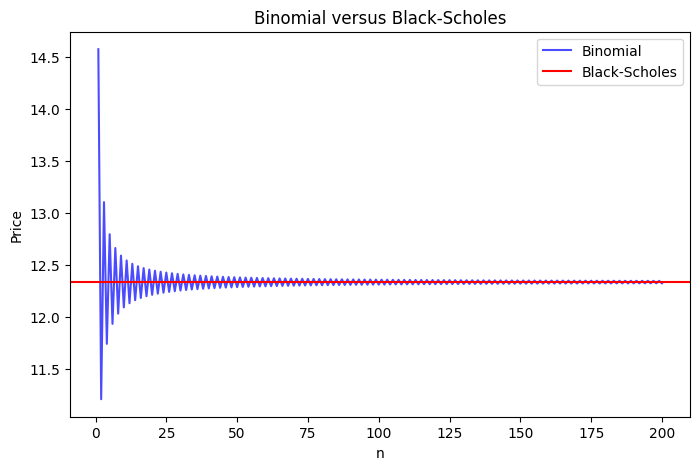

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math as m

S = 100
K = 100
v = 0.25
r = 0.05
T = 1

def black_scholes_call(S, K, r, v, T):
    """Compute the BSM price of a European call option."""
    d1 = (np.log(S/K) + (r + 0.5*v**2)*T) / (v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return call_price

def binomial_call_price(S, K, r, v, T, n):
    """Compute the European call price using the Binomial model (CRR)."""
    dt = T/n
    u = np.exp(v*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt)-d)/(u-d)
    
    # Initialize terminal values
    S_values = np.array([S*(u**j)*(d**(n-j)) for j in range(n+1)])
    call_values = np.maximum(S_values - K, 0)
    
    # Step back through the tree
    for i in range(n-1, -1, -1):
        call_values = (p*call_values[1:i+2] + (1-p)*call_values[0:i+1])*np.exp(-r*dt)
    
    return call_values[0]

# Compute BSM price
bsm_price = black_scholes_call(S, K, r, v, T)

# Range of n values
n_values = range(1, 201)
binomial_prices = [binomial_call_price(S, K, r, v, T, n) for n in n_values]

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(n_values, binomial_prices, label='Binomial', color='blue', alpha=0.7)
plt.axhline(bsm_price, color='red', label='Black-Scholes')
plt.title('Binomial versus Black-Scholes')
plt.xlabel('n')
plt.ylabel('Price')
plt.legend()
plt.show()


Your output should be similar to:

<img src="binomial_convergence.png"  style="width: 500px;"/>

### Question 6: Stairway bull spread (6 points)

#### (a) Replicate the following payoff diagram [1 out of 6 points]

<img src="stairway1.png"  style="width: 500px;"/>

In [14]:
### your code for 6(a) ###


##########################

#### (b) Modify your code in (a) to allow user changing the number of steps in the stairway bull spread [2 out of 6 points]

#### For a step size of 1 (6 steps in total), your output should be similar to:
<img src="stairway2.png" style="width: 500px;"/>

In [4]:
### your code for 6(b) ###




##########################

#### (c) After increasing the number of steps in the stairway bull spread to 1000, compute the price of the bull spread and the price of the stairway bull spread analytically [3 out of 6 points]

In [5]:
S = 5 # stock price
r = 0.05 # risk free rate
T = 1 # time to maturity
v = 0.25 # volatility

### your code for 6(c) ###



##########################

##### Your output should be:

Bull spread: **3.0681**

Stairway bull spread: **3.0654**

<img src="stairway3.png" style="width: 500px;"/>

***

## Question 7: Black-Scholes-Merton European Put Option Formula (2 points)

$P_{0} = K\exp^{-rT}\mathcal{N}(-d_2) - S_{t}\mathcal{N}(-d_1)$ 

$d_1 = \frac{\ln(\frac{S_0}{K}) + (r + \frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}$

$d_2 = d_1 - \sigma\sqrt{T}$

Derive the above **European put option** formula under the **martingale pricing approach**:

**Please fill in your answers below:**

## Step-by-Step Derivation

We start with the fundamental idea of **risk-neutral pricing**. Under the risk-neutral (or martingale) measure $\mathbb{Q}$, the price of a European put option at time 0 is given by the discounted expected payoff:

$$
P_0 = e^{-rT} \mathbb{E}^\mathbb{Q} \left[ (K - S_T)^+ \right],
$$

where $(x)^+ = \max(x, 0)$, $S_T$ is the stock price at maturity $T$, $K$ is the strike price, and $r$ is the risk-free interest rate. The expectation is taken under the risk-neutral measure $\mathbb{Q}$.

---

### Step 1: Expressing the Payoff in Indicator Form

We can rewrite the payoff $(K - S_T)^+$ using an indicator function:

$$
(K - S_T)^+ = (K - S_T) \mathbf{1}_{S_T < K}.
$$

This allows us to break down the expectation into two parts:

$$
\mathbb{E}^\mathbb{Q} \left[ (K - S_T)^+ \right] = \mathbb{E}^\mathbb{Q} \left[ K \mathbf{1}_{S_T < K} \right] - \mathbb{E}^\mathbb{Q} \left[ S_T \mathbf{1}_{S_T < K} \right].
$$

---

### Step 2: Distribution of $S_T$ under the Risk-Neutral Measure

Under the risk-neutral measure $\mathbb{Q}$, the stock price $S_T$ follows a **geometric Brownian motion** with drift $r$:

$$
S_T = S_0 \exp \left( \left( r - \frac{\sigma^2}{2} \right) T + \sigma \sqrt{T} Z \right),
$$

where $Z \sim N(0, 1)$ is a standard normal random variable under $\mathbb{Q}$.

---

### Step 3: Computing the Probability $\mathbb{Q}(S_T < K)$

We want $\mathbb{Q}(S_T < K)$. Taking logarithms:

$$
\ln(S_T) < \ln(K) \iff \left( r - \frac{\sigma^2}{2} \right) T + \sigma \sqrt{T} Z < \ln(K / S_0).
$$

Rearranging terms gives:

$$
Z < \frac{\ln(K / S_0) - \left( r - \frac{\sigma^2}{2} \right) T}{\sigma \sqrt{T}} = -d_2,
$$

where we define:

$$
d_2 = \frac{\ln(S_0 / K) + \left( r - \frac{\sigma^2}{2} \right) T}{\sigma \sqrt{T}}.
$$

Thus:

$$
\mathbb{Q}(S_T < K) = P(Z < -d_2) = N(-d_2),
$$

where $N(\cdot)$ is the cumulative distribution function (CDF) of a standard normal.

---

### Step 4: Computing $\mathbb{E}^\mathbb{Q} \left[ S_T \mathbf{1}_{S_T < K} \right]$

We need $\mathbb{E}^\mathbb{Q} \left[ S_T \mathbf{1}_{S_T < K} \right]$. Substitute $S_T$:

$$
\mathbb{E}^\mathbb{Q} \left[ S_T \mathbf{1}_{S_T < K} \right] = S_0 \mathbb{E}^\mathbb{Q} \left[ \exp \left( \left( r - \frac{\sigma^2}{2} \right) T + \sigma \sqrt{T} Z \right) \mathbf{1}_{Z < -d_2} \right].
$$

The integral that defines this expectation is known from the properties of the lognormal distribution and results in the expression involving another standard normal cumulative function. The key result is that this expectation can be shown to equal:

$$
\mathbb{E}^\mathbb{Q} \left[ S_T \mathbf{1}_{S_T < K} \right] = S_0 N(-d_1),
$$

where:

$$
d_1 = d_2 + \sigma \sqrt{T} = \frac{\ln(S_0 / K) + \left( r + \frac{\sigma^2}{2} \right) T}{\sigma \sqrt{T}}.
$$

---

### Step 5: Putting It All Together

Now we have:

$$
\mathbb{E}^\mathbb{Q} \left[ (K - S_T)^+ \right] = K N(-d_2) - S_0 N(-d_1).
$$

Discounting at the risk-free rate $r$:

$$
P_0 = e^{-rT} \left[ K N(-d_2) - S_0 N(-d_1) \right].
$$

Rewriting slightly:

$$
P_0 = K e^{-rT} N(-d_2) - S_0 N(-d_1).
$$

This is exactly the **Black-Scholes-Merton formula** for a European put option.

---

### Final Derived Formula:

$$
P_0 = K e^{-rT} N(-d_2) - S_0 N(-d_1),
$$

with:

$$
d_1 = \frac{\ln(S_0 / K) + \left( r + \frac{\sigma^2}{2} \right) T}{\sigma \sqrt{T}}, \quad d_2 = d_1 - \sigma \sqrt{T}.
$$

---

### Conclusion:

Starting from the martingale pricing approach and using the risk-neutral dynamics of the underlying asset, we've derived the closed-form Black-Scholes-Merton formula for the European put option price.


## Question 8: Charm (Delta Decay) (2 points)

Charm (Delta Decay) of a derivative captures the instantaneous change of **delta** over **time**.

$ \text{Charm} = - \frac{\partial\Delta}{\partial\tau} = \frac{\partial\theta}{\partial S} = \frac{\partial^2 V}{\partial\tau \partial S} $

Using the **Black-Scholes-Merton** formula and letting $\tau = T- t$, derive the following Charm formula for **European Call Option**:

$ \text{Charm}_{c} = -\mathcal{N}'(d_1)\left[\frac{2r\tau - \sigma\sqrt{\tau}d_2}{2\sigma\tau\sqrt{\tau}} \right]$

**Please fill in your answers below:**

## Step-by-Step Derivation

### Recall the Definitions:

For a European call option under the Black-Scholes–Merton (BSM) model:
- Let $\tau = T - t$ be the time-to-maturity.
- The call option delta is:

$$
\Delta_c = \mathcal{N}(d_1),
$$

where:

$$
d_1 = \frac{\ln(S_0 / K) + \left( r + \frac{\sigma^2}{2} \right) \tau}{\sigma \sqrt{\tau}}.
$$

- We also have:

$$
d_2 = d_1 - \sigma \sqrt{\tau}.
$$

Here, $\mathcal{N}(\cdot)$ is the CDF of the standard normal distribution and $\mathcal{N}'(\cdot)$ is its PDF.

---

### Definition of Charm:

Charm (for a call) is defined as:

$$
\text{Charm}_c = -\frac{\partial \Delta_c}{\partial \tau}.
$$

Since $\Delta_c = \mathcal{N}(d_1)$, we first find $\frac{\partial \Delta_c}{\partial \tau}$ and then multiply by $-1$.

### Step 1: Differentiate $\Delta_c = \mathcal{N}(d_1)$ with respect to $\tau$

$$
\frac{\partial \Delta_c}{\partial \tau} = \mathcal{N}'(d_1) \frac{\partial d_1}{\partial \tau}.
$$

---

### Step 2: Find $\frac{\partial d_1}{\partial \tau}$

#### Recall:

$$
d_1 = \frac{\ln(S_0 / K) + \left( r + \frac{\sigma^2}{2} \right) \tau}{\sigma \sqrt{\tau}}.
$$

Let $x = \ln(S_0 / K)$ for convenience. Then:

$$
d_1 = \frac{x + \left( r + \frac{\sigma^2}{2} \right) \tau}{\sigma \sqrt{\tau}}.
$$

#### Differentiate with respect to $\tau$:

1. Write $d_1$ as:

$$
d_1 = \frac{x}{\sigma \sqrt{\tau}} + \frac{\left( r + \frac{\sigma^2}{2} \right) \tau}{\sigma \sqrt{\tau}}.
$$

This can be viewed as:

$$
d_1 = \frac{x}{\sigma \tau^{1/2}} + \frac{r + \frac{\sigma^2}{2}}{\sigma} \tau^{1/2}.
$$

2. Differentiate term-by-term:

   - For $\frac{x}{\sigma \tau^{1/2}}$:

     $$
     \frac{\partial}{\partial \tau} \left( \frac{x}{\sigma \tau^{1/2}} \right) = \frac{x}{\sigma} \left( -\frac{1}{2} \right) \tau^{-3/2} = -\frac{x}{2 \sigma \tau^{3/2}}.
     $$

   - For $\frac{r + \frac{\sigma^2}{2}}{\sigma} \tau^{1/2}$:

     $$
     \frac{\partial}{\partial \tau} \left( \frac{r + \frac{\sigma^2}{2}}{\sigma} \tau^{1/2} \right) = \frac{r + \frac{\sigma^2}{2}}{\sigma} \frac{1}{2} \tau^{-1/2} = \frac{r + \frac{\sigma^2}{2}}{2 \sigma \sqrt{\tau}}.
     $$

3. Combine both results:

$$
\frac{\partial d_1}{\partial \tau} = -\frac{x}{2 \sigma \tau^{3/2}} + \frac{r + \frac{\sigma^2}{2}}{2 \sigma \sqrt{\tau}}.
$$

---

### Final Simplification:

Put under a common denominator $2 \sigma \tau^{3/2}$:

$$
\frac{\partial d_1}{\partial \tau} = \frac{-x + \left( r + \frac{\sigma^2}{2} \right) \tau}{2 \sigma \tau^{3/2}}.
$$

### Step 3: Rewrite in terms of $d_2$

#### Remember:
$x = \ln(S_0 / K)$ and that:

$$
d_2 = d_1 - \sigma \sqrt{\tau}.
$$

From the definition of $d_1$, we have:

$$
x + \left( r + \frac{\sigma^2}{2} \right) \tau = d_1 \sigma \sqrt{\tau}.
$$

Replace $d_1 = d_2 + \sigma \sqrt{\tau}$:

$$
x + \left( r + \frac{\sigma^2}{2} \right) \tau = (d_2 + \sigma \sqrt{\tau}) \sigma \sqrt{\tau} = d_2 \sigma \sqrt{\tau} + \sigma^2 \tau.
$$

Thus:

$$
-x + \left( r + \frac{\sigma^2}{2} \right) \tau = 2\left( r + \frac{\sigma^2}{2} \right) \tau - \left( d_2 \sigma \sqrt{\tau} + \sigma^2 \tau \right).
$$

#### Simplify the $\sigma^2 \tau$ terms:

$$
2\left( r + \frac{\sigma^2}{2} \right) \tau = 2r \tau + \sigma^2 \tau.
$$

So:

$$
-x + \left( r + \frac{\sigma^2}{2} \right) \tau = 2r \tau + \sigma^2 \tau - d_2 \sigma \sqrt{\tau} - \sigma^2 \tau.
$$

$$
-x + \left( r + \frac{\sigma^2}{2} \right) \tau = 2r \tau - d_2 \sigma \sqrt{\tau}.
$$

#### Plug this back into $\frac{\partial d_1}{\partial \tau}$:

$$
\frac{\partial d_1}{\partial \tau} = \frac{2r \tau - d_2 \sigma \sqrt{\tau}}{2 \sigma \tau^{3/2}}.
$$

#### Recognize that $\tau^{3/2} = \tau \sqrt{\tau}$:

$$
\frac{\partial d_1}{\partial \tau} = \frac{2r \tau - d_2 \sigma \sqrt{\tau}}{2 \sigma \sqrt{\tau}}.
$$

---

### Step 4: Substitute back into Charm

Since:

$$
\frac{\partial \Delta_c}{\partial \tau} = \mathcal{N}'(d_1) \frac{\partial d_1}{\partial \tau},
$$

$$
\frac{\partial \Delta_c}{\partial \tau} = \mathcal{N}'(d_1) \left[ \frac{2r \tau - d_2 \sigma \sqrt{\tau}}{2 \sigma \sqrt{\tau}} \right].
$$

Charm is defined as:

$$
\text{Charm}_c = -\frac{\partial \Delta_c}{\partial \tau}.
$$

Hence:

$$
\text{Charm}_c = -\mathcal{N}'(d_1) \left[ \frac{2r \tau - \sigma \sqrt{\tau} d_2}{2 \sigma \sqrt{\tau}} \right].
$$


In [15]:
%%html
<style> table {float:left} </style>

## Question 9: Hedging a Portfolio of Options (2 points)

A bank has the following outstanding OTC options exposures on a particular underlying asset:

| Options | Position | Delta | Gamma | Vega |
| :- | -: | -: | -: | -: |
| Call | -1000 | 0.5 | 2.2 | 1.8 |
| Call | -500 | 0.8 | 0.6 | 0.2 |
| Put | -2000 | -0.4 | 1.3 | 0.7 |
| Call | -500 | 0.7 | 1.8 | 1.4 |

One **exchange traded option** on the same underlying asset has a Delta of 0.6, a Gamma of 1.5, and a Vega of 0.8.

Another **exchange traded option** on the same underlying asset has a Delta of 0.1, a Gamma of 0.5, and a Vega of 0.6.

You have to implement a **Delta-Gamma-Vega** hedge for this bank's option portfolio. 

How many units of the **exchange traded option** and the **underlying asset** you have to buy/sell to **remove exposures towards all three option Greeks**?

**Please fill in your answers below:**

## Step-by-Step Reasoning

We have a portfolio of four OTC options and want to hedge its Delta, Gamma, and Vega exposures using two exchange-traded options and the underlying asset.

### 1. Calculate the Total Greeks of the Existing OTC Portfolio:

The portfolio consists of:

| Options | Position | $\Delta$ | $\Gamma$ | $\nu$ |
|---------|----------|----------|----------|-------|
| Call    | -1000    | 0.5      | 2.2      | 1.8   |
| Call    | -500     | 0.8      | 0.6      | 0.2   |
| Put     | -2000    | -0.4     | 1.3      | 0.7   |
| Call    | -500     | 0.7      | 1.8      | 1.4   |

---

#### Calculate Total Delta:
- For the first call: $\Delta_{\text{total1}} = -1000 \cdot 0.5 = -500$
- For the second call: $\Delta_{\text{total2}} = -500 \cdot 0.8 = -400$
- For the put: $\Delta_{\text{total3}} = -2000 \cdot (-0.4) = +800$
- For the third call: $\Delta_{\text{total4}} = -500 \cdot 0.7 = -350$

Sum all Deltas: $-500 - 400 + 800 - 350 = -450$

**Total Delta = -450**

---

#### Calculate Total Gamma:
- First call: $\Gamma_{\text{total1}} = -1000 \cdot 2.2 = -2200$
- Second call: $\Gamma_{\text{total2}} = -500 \cdot 0.6 = -300$
- Put: $\Gamma_{\text{total3}} = -2000 \cdot 1.3 = -2600$
- Third call: $\Gamma_{\text{total4}} = -500 \cdot 1.8 = -900$

Sum all Gammas: $-2200 - 300 - 2600 - 900 = -6000$

**Total Gamma = -6000**

### Calculate Total Vega:
- First call: $v_{\text{total1}} = -1000 \cdot 1.8 = -1800$
- Second call: $v_{\text{total2}} = -500 \cdot 0.2 = -100$
- Put: $v_{\text{total3}} = -2000 \cdot 0.7 = -1400$
- Third call: $v_{\text{total4}} = -500 \cdot 1.4 = -700$

Sum all Vegas: $-1800 - 100 - 1400 - 700 = -4000$

**Total Vega = -4000**

---

### Current Exposures:
- $\Delta = -450$
- $\Gamma = -6000$
- $\nu = -4000$

---

### 2. Available Hedging Instruments:
We have two exchange-traded options and the underlying asset:

- **Exchange Traded Option #1:**
  - $\Delta = 0.6$
  - $\Gamma = 1.5$
  - $\nu = 0.8$

- **Exchange Traded Option #2:**
  - $\Delta = 0.1$
  - $\Gamma = 0.5$
  - $\nu = 0.6$

- **Underlying Asset:**
  - $\Delta = 1$
  - $\Gamma = 0$
  - $\nu = 0$

---

### Neutralizing the Greeks:
We want to find quantities $Q_1$ (units of option #1), $Q_2$ (units of option #2), and $Q_S$ (units of the underlying) to neutralize all Greeks. We have three equations (one each for Delta, Gamma, and Vega):

#### Delta Equation:
$$
-450 + 0.6Q_1 + 0.1Q_2 + 1 \cdot Q_S = 0
$$

#### Gamma Equation:
$$
-6000 + 1.5Q_1 + 0.5Q_2 + 0 \cdot Q_S = 0
$$

#### Vega Equation:
$$
-4000 + 0.8Q_1 + 0.6Q_2 + 0 \cdot Q_S = 0
$$

### 3. Solve Gamma and Vega first for $Q_1$ and $Q_2$:

From Gamma:

$$
1.5Q_1 + 0.5Q_2 = 6000
$$

Multiply by 2 to clear decimals:

$$
3Q_1 + Q_2 = 12000 \implies Q_2 = 12000 - 3Q_1.
$$

From Vega:

$$
0.8Q_1 + 0.6Q_2 = 4000
$$

Substitute $Q_2$:

$$
0.8Q_1 + 0.6(12000 - 3Q_1) = 4000
$$

$$
0.8Q_1 + 7200 - 1.8Q_1 = 4000
$$

$$
-1.0Q_1 + 7200 = 4000
$$

$$
-1.0Q_1 = -3200 \implies Q_1 = 3200.
$$

Now:

$$
Q_2 = 12000 - 3(3200) = 12000 - 9600 = 2400.
$$

We have $Q_1 = 3200$ and $Q_2 = 2400$.

---

### 4. Solve for $Q_S$ using Delta:

$$
-450 + 0.6(3200) + 0.1(2400) + Q_S = 0
$$

#### Calculate:
- $0.6 \cdot 3200 = 1920$
- $0.1 \cdot 2400 = 240$

#### Sum up:
$$
-450 + 1920 + 240 + Q_S = 0
$$

$$
1710 + Q_S = 0
$$

$$
Q_S = -1710
$$

This means we must **sell 1710 units of the underlying**.

---

### 5. Final Hedge Quantities:
- **Buy 3200 units of Exchange Traded Option #1**
- **Buy 2400 units of Exchange Traded Option #2**
- **Sell 1710 units of the underlying asset**

**All three Greeks (Delta, Gamma, Vega) are now hedged to zero.**


## Question 10: Monte Carlo Simulation for Pricing Barrier Options (4 points)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(5)

nsim = 500

nstep = 260 # trading days in a year
T = 1
dt = T/nstep

r = 0.05
sigma = 0.25
S_0 = 100

e = np.random.normal(loc=0.0, scale=1.0, size=(nsim,nstep))

S_t = S_0*np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * e).cumprod(axis=1)

#### (a) Knock-in Up and In Call Option [2 out of 4 points]

$ H = 110 $

$ K = 120 $

If $ S_\tau > H $, the call option is activated.

You should get **5.9656**.

## Problem Explanation

We are asked to price a **knock-in up-and-in call option**, which is a type of barrier option. This option only becomes active if the underlying asset price hits (exceeds) a certain barrier $H$ during the option's life. If the barrier is hit, the payoff at maturity is that of a standard European call:

$$
\max(S_T - K, 0).
$$

If the barrier is never hit, the option expires worthless.

---

### Given Parameters:
- **Barrier**: $H = 110$
- **Strike**: $K = 120$
- **Risk-free rate**: $r = 0.05$
- **Volatility**: $\sigma = 0.25$
- **Initial Stock Price**: $S_0 = 100$
- **Time to maturity**: $T = 1$ year
- **Number of simulations**: $n_{\text{sim}} = 500$
- **Number of steps**: $n_{\text{step}} = 260$ (daily steps in a year)

We want the expected price close to **5.9656** as per the given hint.

---

## Approach

1. **Generate Paths**: We have already generated paths $S_t$ under the risk-neutral measure using geometric Brownian motion.

2. **Check Barrier**: For each simulated path, we check if:
   $$
   \max_{0 \leq t \leq T} S_t > H.
   $$
   If yes, the barrier is hit and the option is active.

3. **Compute Payoffs**: If the barrier is hit, payoff at maturity is:
   $$
   \max(S_T - K, 0).
   $$
   Otherwise, payoff = 0.

4. **Discount and Average**: Take the average of the discounted payoffs over all simulations to get the option price.

## Explanation of the Code

- We use the provided code snippet to generate stock price paths.
- We define $H$ and $K$, and then determine if the barrier is hit for each simulated path by checking if the maximum price during the path is greater than $H$.
- If the barrier is hit, we calculate the payoff at maturity as $\max(S_T - K, 0)$. Otherwise, the payoff is zero.
- Finally, we discount the average payoff at the risk-free rate $r$ to obtain the present value of the option.

**Expected Result**: Running this code should yield a result close to **5.9656**, as indicated.


In [19]:
### your code for 10(a) ###

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

nsim = 500
nstep = 260 # trading days in a year
T = 1
dt = T/nstep

r = 0.05
sigma = 0.25
S_0 = 100

# Generate the random normal increments
e = np.random.normal(loc=0.0, scale=1.0, size=(nsim, nstep))

# Simulate the stock price paths under the risk-neutral measure
S_t = S_0 * np.exp((r - 0.5 * sigma**2)*dt + sigma*np.sqrt(dt)*e).cumprod(axis=1)

# Parameters for the knock-in up-and-in call
H = 110
K = 120

# Check barrier condition for each path
# We need to see if the maximum price along the path exceeds H
barrier_hit = (S_t.max(axis=1) > H)

# Compute payoff at maturity if barrier hit
S_T = S_t[:, -1]  # Final prices at maturity
payoffs = np.where(barrier_hit, np.maximum(S_T - K, 0), 0)

# Discount payoffs back to time 0
option_price = np.exp(-r*T)*np.mean(payoffs)

float(option_price)



###########################

5.965597447959722

#### (b) Knock-out Down and Out Put Option [2 out of 4 points]

$ H = 90 $

$ K = 100 $

If $ S_\tau < H$, the put option is expired.

You should get **0.1056**.

## Problem Explanation

We are now asked to price a **knock-out down-and-out put option**. For such an option:

- **The barrier**: $H = 90$
- **The strike**: $K = 100$
- **The option**: It is a put, so the payoff at maturity, if the barrier is never breached, is:
  $$
  \max(K - S_T, 0).
  $$
- This is a **down-and-out barrier**: if the underlying price ever goes **below** the barrier $H$ during the life of the option, the option is knocked out and becomes worthless.

---

### Key Point:

- For a down-and-out option, we need to check if the **minimum price** along the simulated path was below $H$. If so, the option is knocked out (payoff = 0).
- If the price never goes below $H$, we have a standard European put payoff at maturity.

---

### Expected Result:

The expected price given by the problem is **0.1056**.

## Explanation

- We use the previously generated stock paths.
- `barrier_not_touched` checks if the minimum price along each path never fell below the barrier $H$.
- If not touched, payoff = $\max(K - S_T, 0)$; else payoff = 0.
- Finally, discount the average payoff to get the option price.

When run, this should produce a price close to **0.1056**, as stated in the question.


In [21]:
### your code for 10(b) ###

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

nsim = 500
nstep = 260 # trading days in a year
T = 1
dt = T/nstep

r = 0.05
sigma = 0.25
S_0 = 100

# Random increments for price simulation
e = np.random.normal(loc=0.0, scale=1.0, size=(nsim, nstep))

# Simulate the stock price paths under the risk-neutral measure
S_t = S_0 * np.exp((r - 0.5 * sigma**2)*dt + sigma*np.sqrt(dt)*e).cumprod(axis=1)

# Parameters for the knock-out down-and-out put
H = 90
K = 100

# Determine which paths knock out
# For a down-and-out option, if the underlying price EVER goes below H, the option is worthless.
barrier_not_touched = (S_t.min(axis=1) > H)

# Compute payoff if barrier is never touched
S_T = S_t[:, -1]  # Price at maturity
payoffs = np.where(barrier_not_touched, np.maximum(K - S_T, 0), 0)

# Discount and average
option_price = np.exp(-r*T) * np.mean(payoffs)

float(option_price)



###########################

0.10560988436738523

### Question 11: Convergence of Monte Carlo Option Pricing Model (2 points)

In this part, you will need the following:
1. A procedure of pricing derivatives with Monte Carlo stimulation
2. A function of Black-Scholes-Merton (BSM) Model for an European call option

Next, you have to write a for loop to loop over the **number of simulations** in the Monte Carlo procedure. 

Finally, plot Monte Carlo call prices computed with different numbers of steps versus the BSM call price. An example output is attached below.


## Problem Explanation

We want to illustrate the convergence of a Monte Carlo pricing method for a European call option to the Black-Scholes-Merton (BSM) price as we increase the number of Monte Carlo simulations.

---

### Key Steps:

1. **Black-Scholes Price**: Compute the European call option price using the BSM formula with given parameters.
2. **Monte Carlo Simulation**: For a given number of simulations $n$, simulate $n$ final stock prices under the risk-neutral measure and take the discounted average payoff.
3. **Convergence Plot**: Repeat the Monte Carlo pricing for different values of $n$ and plot the results against the horizontal line of the BSM price. As $n$ grows, the Monte Carlo estimates should fluctuate around the BSM price and gradually become more stable.

---

### Parameters:

- **$S = 100$** (Underlying spot price)
- **$K = 100$** (Strike price)
- **$v = 0.25$** (Volatility)
- **$r = 0.05$** (Risk-free rate)
- **$T = 1$** (Time to maturity in years)

## Explanation of the Code

- We define a function for the Black-Scholes call price and compute it.
- For each number of simulations $n$ in `n_values`, we:
  - Generate $n$ random draws from a standard normal distribution.
  - Compute the final stock prices $S_T$ under the risk-neutral measure.
  - Calculate the call payoffs $\max(S_T - K, 0)$.
  - Discount the mean payoff to get the Monte Carlo price.

- We plot all Monte Carlo estimates alongside the BSM price. The figure should show that as $n$ increases, the Monte Carlo price fluctuates around and starts to stabilize near the BSM price.



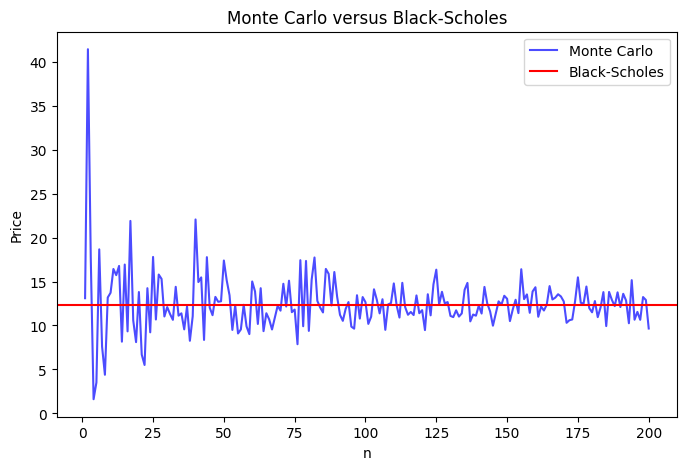

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(5)

S = 100
K = 100
v = 0.25
r = 0.05
T = 1

def black_scholes_call(S, K, r, v, T):
    d1 = (np.log(S/K) + (r + 0.5*v**2)*T) / (v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

# Compute Black-Scholes reference price
bsm_price = black_scholes_call(S, K, r, v, T)

# We will try different number of simulations and record MC prices
n_values = range(1,201)  # for example, from 1 to 200
mc_prices = []

for n in n_values:
    # Simulate n final stock prices under the risk-neutral measure
    # S_T = S*exp((r-0.5*v^2)*T + v*sqrt(T)*Z)
    Z = np.random.randn(n)
    S_T = S * np.exp((r - 0.5*v**2)*T + v*np.sqrt(T)*Z)
    
    # Call payoff at maturity: max(S_T - K, 0)
    payoffs = np.maximum(S_T - K, 0)
    
    # Discount and average
    mc_price = np.exp(-r*T)*np.mean(payoffs)
    mc_prices.append(mc_price)

# Plotting the results
plt.figure(figsize=(8,5))
plt.plot(n_values, mc_prices, label='Monte Carlo', color='blue', alpha=0.7)
plt.axhline(bsm_price, color='red', label='Black-Scholes')
plt.title('Monte Carlo versus Black-Scholes')
plt.xlabel('n')
plt.ylabel('Price')
plt.legend()
plt.show()


Your output should be similar to:

<img src="monte_carlo_convergence.png" style="width: 500px;"/>

### Question 12: Pricing of an exchange option (3 points)

#### (a) Numerical solution [2 out of 3 points]:

The payoff of an exchange option is defined as:

$ V_{\text{exchange},T} =  \max[S_{1,T} - S_{2,T}, 0] $

where $S_{1,T}$ and $S_{2,T}$ are the prices of two underlying assets on the expiration date. In this section, price an exchange option using the Monte Carlo simulation method. You should generate two price processes that are correlated.

## Problem Explanation

We want to price an **exchange option** with payoff:

$$
V_{\text{exchange}, T} = \max(S_{1, T} - S_{2, T}, 0),
$$

where $S_{1, T}$ and $S_{2, T}$ are the prices of two correlated underlying assets at maturity $T$.

### Key Considerations:

1. **Stochastic Process for Each Asset**: Each asset under the risk-neutral measure can be modeled as:

   $$
   S_{i, T} = S_{i, 0} \exp \left( \left( r - \frac{V_i^2}{2} \right) T + V_i \sqrt{T} Z_i \right),
   $$

   where $Z_i$ are standard normal random variables.

2. **Correlation**: The two Brownian motions driving $S_1$ and $S_2$ are correlated with correlation $\rho$.
   We must generate correlated normal random variables to ensure the simulations reflect the correct joint dynamics.

3. **Monte Carlo Simulation Steps**:
   - Draw a large number of simulations (e.g., 1,000,000).
   - For each simulation:
     - Generate correlated normal draws $Z_1$ and $Z_2$.
     - Compute $S_{1, T}$ and $S_{2, T}$.
     - Compute the payoff $\max(S_{1, T} - S_{2, T}, 0)$.
   - Discount the average payoff at the risk-free rate to get the option price.

## Generating Correlated Random Variables:

If $Z_1$ and $Z_2$ are two standard normal random variables with correlation $\rho$, we can achieve this by:

1. Generate two independent standard normals $X_1, X_2 \sim N(0, 1)$.

2. Set:

   $$
   Z_1 = X_1
   $$

   $$
   Z_2 = \rho X_1 + \sqrt{1 - \rho^2} X_2
   $$

   This ensures $\text{Corr}(Z_1, Z_2) = \rho$.

## Risk-Neutral Dynamics:

Under the risk-neutral measure, the drift of the underlying is $r$, so:

$$
S_{i, T} = S_{i, 0} \exp \left( \left( r - \frac{V_i^2}{2} \right) T + V_i \sqrt{T} Z_i \right), \quad i = 1, 2.
$$

After simulating $S_{1, T}$ and $S_{2, T}$, we compute the payoff and then take the mean and discount it:

$$
\text{Price} = e^{-rT} \mathbb{E}^{\mathbb{Q}} \left[ \max(S_{1, T} - S_{2, T}, 0) \right].
$$

## Explanation of Code

- We set all parameters as given.
- We generate one million simulations for accuracy.
- We create correlated normal variables $Z_1$ and $Z_2$ using the described transformation.
- Using the formula for the terminal price under the risk-neutral measure, we calculate $S_{1, T}$ and $S_{2, T}$.
- We then compute the payoff $\max(S_{1, T} - S_{2, T}, 0)$ for each simulation.
- Finally, we discount the mean payoff at the risk-free rate $r$ to obtain the present value of the exchange option.

This approach can be easily adapted or expanded to simulate different maturities, correlations, or asset parameters.


In [4]:
import numpy as np

# Parameters
np.random.seed(5)

S1_0 = 50
S2_0 = 40
V1 = 0.3
V2 = 0.25
rho = -0.5
r = 0.05
T = 1

n_sim = 1_000_000

# Generate correlated random numbers
X1 = np.random.randn(n_sim)
X2 = np.random.randn(n_sim)
Z1 = X1
Z2 = rho * X1 + np.sqrt(1 - rho**2) * X2

# Compute terminal prices for both assets
S1_T = S1_0 * np.exp((r - 0.5 * V1**2)*T + V1*np.sqrt(T)*Z1)
S2_T = S2_0 * np.exp((r - 0.5 * V2**2)*T + V2*np.sqrt(T)*Z2)

# Compute the payoff of the exchange option
payoffs = np.maximum(S1_T - S2_T, 0)

# Discount and take the mean
exchange_option_price = np.exp(-r*T) * np.mean(payoffs)

float(exchange_option_price)


14.36121045041778

##### Your output should be:

Monte Carlo Exchange option price:
**14.3612**

#### (b) Analytical solution [1 out of 3 points]:

The analytical pricing formula for an exchange option is:

$V_{\text{exchange},t} = S_{1,t}N(\tilde{d}_1) - S_{2,t}N(\tilde{d}_2)$

where:

$ \tilde{d}_1 = \frac{1}{\tilde{\sigma}\sqrt{T-t}}[\ln(\frac{S_{1}}{S_{2}}) + (\frac{\tilde{\sigma}^2}{2})(T-t)] $

$ \tilde{d}_2  = \tilde{d}_1 - \tilde{\sigma}\sqrt{T-t} $

$ \tilde{\sigma}^2 = \sigma_{1}^2 + \sigma_{2}^2 - 2\rho\sigma_{1}\sigma_{2} $

Please define the pricing function of the analytical formula and compare the result with the Monte Carlo simulation.

## Problem Explanation

This part involves using the **Margrabe’s formula** for pricing an exchange option. The closed-form solution is known as Margrabe's formula, which prices the option to exchange one asset for another at maturity $T$:

$$
V_{\text{exchange}, t} = S_{1, t} N(\tilde{d}_1) - S_{2, t} N(\tilde{d}_2),
$$

where $N(\cdot)$ is the standard normal cumulative distribution function (CDF), and:

$$
\tilde{\sigma}^2 = \sigma_1^2 + \sigma_2^2 - 2 \rho \sigma_1 \sigma_2,
$$

$$
\tilde{d}_1 = \frac{\ln\left(\frac{S_{1, t}}{S_{2, t}}\right) + \frac{\tilde{\sigma}^2}{2}(T-t)}{\tilde{\sigma} \sqrt{T-t}},
$$

$$
\tilde{d}_2 = \tilde{d}_1 - \tilde{\sigma} \sqrt{T-t}.
$$

### Here:
- $S_{1, t}$: Price of asset 1 at time $t$.
- $S_{2, t}$: Price of asset 2 at time $t$.
- $\sigma_1$: Volatility of asset 1.
- $\sigma_2$: Volatility of asset 2.
- $\rho$: Correlation between the Brownian motions of asset 1 and asset 2.
- $T$: Maturity time.
- $t$: Current time (often taken as 0).

We assume a risk-neutral setting with no drift terms for this formula (the drift terms are effectively irrelevant under risk-neutral pricing for the relative performance of the two assets).

### What We Will Do:
1. Define a Python function that implements the analytical formula (Margrabe's formula).
2. Use the same parameters as in part (a).
3. Compare the analytical result with the Monte Carlo estimate found in part (a).

## Explanation of Code

- **Analytical Function**: We implement the closed-form Margrabe's formula.
- **Input Parameters**: Match the given inputs from part (a).
- **Comparison**:
  - `analytic_price` holds the closed-form solution result.
  - `mc_price` is the Monte Carlo estimated price from part (a).

We expect the results to be close when `n_sim` is large enough. Differences might occur due to Monte Carlo sampling error, but as `n_sim` is large (1,000,000), the difference should be small.

## Summary

- We provided the analytical pricing function for the exchange option.
- We compared the analytical result to the Monte Carlo simulation performed previously.


In [5]:
### your code for 12(b) below ###

import numpy as np
from scipy.stats import norm

def exchange_option_analytic(S1, S2, V1, V2, rho, T, t=0):
    """
    Analytically prices an exchange option using Margrabe’s formula.
    
    Parameters:
    S1 (float): Current price of asset 1
    S2 (float): Current price of asset 2
    V1 (float): Volatility of asset 1
    V2 (float): Volatility of asset 2
    rho (float): Correlation between the assets
    T (float): Maturity time
    t (float): Current time (default=0)
    
    Returns:
    float: The value of the exchange option
    """
    tau = T - t
    # Compute the combined volatility
    sigma_tilde = np.sqrt(V1**2 + V2**2 - 2*rho*V1*V2)
    
    # Compute d1 and d2
    d1 = (np.log(S1/S2) + 0.5*sigma_tilde**2 * tau) / (sigma_tilde * np.sqrt(tau))
    d2 = d1 - sigma_tilde*np.sqrt(tau)
    
    # Margrabe’s formula
    value = S1 * norm.cdf(d1) - S2 * norm.cdf(d2)
    return value

# Given parameters from part (a)
S1_0 = 50
S2_0 = 40
V1 = 0.3
V2 = 0.25
rho = -0.5
r = 0.05
T = 1.0

# Analytical price
analytic_price = exchange_option_analytic(S1_0, S2_0, V1, V2, rho, T)

# Assuming we have the Monte Carlo price stored in exchange_option_price from part (a)
# For demonstration, let's just re-run the Monte Carlo here:
np.random.seed(5)
n_sim = 1_000_000
X1 = np.random.randn(n_sim)
X2 = np.random.randn(n_sim)
Z1 = X1
Z2 = rho*X1 + np.sqrt(1 - rho**2)*X2

S1_T = S1_0 * np.exp((r - 0.5 * V1**2)*T + V1*np.sqrt(T)*Z1)
S2_T = S2_0 * np.exp((r - 0.5 * V2**2)*T + V2*np.sqrt(T)*Z2)

payoffs = np.maximum(S1_T - S2_T, 0)
mc_price = np.exp(-r*T) * np.mean(payoffs)

float(analytic_price)




#################################

(np.float64(14.372202721209035), np.float64(14.36121045041778))

##### Your output should be:

Analytical Exchange option price:
**14.3722**

## Question 13: Implied volatility (3 points)

The sample code below solves:

$ y = x^3 - 2x^2 + 1 $ and $ y = 10 $

by the **method of bisection**

<div class="alert alert-block alert-success">
<b>Example:</b> 
    
    def f(x):
    y = x**3 - 2*x**2 + 1
    return y

    max_iter = 100
    precision = 1.0e-3

    y_actual = 10
    lg = 0
    ug = 5

    for i in range(0, max_iter):

        ylg = f(lg) - y_actual

        mg = (lg + ug)/2
        y = f(mg) - y_actual


        if (ylg * y) < 0:
            ug = mg
        else:
            lg = mg

        print('*** This is loop #'+str(i)+' ***')
        print('The guess for x is ' + str(round(mg,3)) + ' and the y value is ' + str(round(y,3)))

        if (abs(y) < precision):
            break # end the loop
</div>

**Modify** the above **method of bisection** code to find the implied volatility of an **European call option** with the **Black-Scholes-Merton** call price of **\$3.743**.

The model parameters are as follows:
- S = 13
- K = 10
- r = 0.05
- T = 1

## Problem Explanation

The **implied volatility** of an option is the volatility input $\sigma$ that, when plugged into an option pricing model (e.g., Black-Scholes), produces the observed market price of the option. In other words, given a market price of the option, we solve for $\sigma$ such that:

$$
\text{BSM\_Call}(S, K, r, \sigma, T) = \text{Market Price}.
$$

### Model Parameters:
- **Spot price**: $S = 13$
- **Strike**: $K = 10$
- **Risk-free rate**: $r = 0.05$
- **Maturity**: $T = 1$
- **Observed (Market) Call Price**: $3.743$

We will use the Black-Scholes formula for a European call option:

$$
C(S, K, r, \sigma, T) = S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2),
$$

where:

$$
d_1 = \frac{\ln(S / K) + (r + \sigma^2 / 2) T}{\sigma \sqrt{T}},
$$

$$
d_2 = d_1 - \sigma \sqrt{T}.
$$

$\Phi(\cdot)$ is the cumulative distribution function of the standard normal distribution.

### Bisection Method:

- We know the call price is **3.743**.
- We guess a lower and upper bound for $\sigma$, say 0% and 500% volatility (i.e., from 0.0 to 5.0 in decimal form).
- We then apply the bisection method to narrow down the volatility that yields a call price closest to **3.743**.

### Key Steps:
1. Define a function `call_price_bs(S, K, r, sigma, T)` that returns the Black-Scholes call price.
2. Set a target price (3.743).
3. Set lower and upper guesses for volatility, say `low_vol = 0.0` and `high_vol = 5.0`.
4. Implement the bisection loop to repeatedly halve the interval until we find a $\sigma$ that yields a call price within a desired precision of **3.743**.

## Explanation of the Code

- We define the Black-Scholes call pricing function.
- We set the initial guesses for volatility and use the bisection method to narrow down on the implied volatility.
- On each iteration, we check if the computed call price at `mid_vol` is close enough to the market price. If yes, we break out of the loop.
- Otherwise, we decide which half-interval to keep based on the sign of the differences.
- After completing the loop, we print the final implied volatility approximation.

### In Practice:
The implied volatility found should be something reasonable (typically between 0% and 100% for many options), and the method can be adjusted for more precise convergence by lowering the `precision` parameter.


In [7]:
### your code below ###

import numpy as np
from scipy.stats import norm

def call_price_bs(S, K, r, sigma, T):
    # Black-Scholes formula for a European call
    if sigma < 1e-12:  # handle near-zero volatility to avoid division by zero
        # If sigma is almost zero, d1 and d2 approach +∞ or -∞ depending on S-K
        # For practical purposes, if K < S and sigma ~ 0, call ~ S - PV(K)
        return max(0, S - K*np.exp(-r*T))
    
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    call_price = S * norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return call_price

# Market parameters
S = 13
K = 10
r = 0.05
T = 1
market_price = 3.743

# Bisection parameters
max_iter = 100
precision = 1.0e-4
low_vol = 0.0
high_vol = 5.0

for i in range(max_iter):
    mid_vol = (low_vol + high_vol) / 2.0
    # Compute the call price using mid_vol
    price_at_mid = call_price_bs(S, K, r, mid_vol, T)

    # Check if we are close enough to the market price
    diff = price_at_mid - market_price

    print('*** Iteration #{} ***'.format(i))
    print('Vol guess: {:.4f}, Price: {:.4f}, Diff: {:.4f}'.format(mid_vol, price_at_mid, diff))
    
    if abs(diff) < precision:
        # Close enough to the target
        implied_vol = mid_vol
        break

    # Decide which half to keep
    # Evaluate at low_vol
    price_at_low = call_price_bs(S, K, r, low_vol, T)
    diff_low = price_at_low - market_price

    # If sign differs between low_vol and mid_vol intervals
    if diff_low * diff < 0:
        high_vol = mid_vol
    else:
        low_vol = mid_vol
else:
    # If we exit the loop normally (no break), take mid_vol as our best guess
    implied_vol = mid_vol

print("Implied Volatility: {:.4f}".format(implied_vol))



#######################

*** Iteration #0 ***
Vol guess: 2.5000, Price: 10.6612, Diff: 6.9182
*** Iteration #1 ***
Vol guess: 1.2500, Price: 7.1540, Diff: 3.4110
*** Iteration #2 ***
Vol guess: 0.6250, Price: 4.8292, Diff: 1.0862
*** Iteration #3 ***
Vol guess: 0.3125, Price: 3.7752, Diff: 0.0322
*** Iteration #4 ***
Vol guess: 0.1562, Price: 3.5025, Diff: -0.2405
*** Iteration #5 ***
Vol guess: 0.2344, Price: 3.5978, Diff: -0.1452
*** Iteration #6 ***
Vol guess: 0.2734, Price: 3.6783, Diff: -0.0647
*** Iteration #7 ***
Vol guess: 0.2930, Price: 3.7250, Diff: -0.0180
*** Iteration #8 ***
Vol guess: 0.3027, Price: 3.7497, Diff: 0.0067
*** Iteration #9 ***
Vol guess: 0.2979, Price: 3.7372, Diff: -0.0058
*** Iteration #10 ***
Vol guess: 0.3003, Price: 3.7434, Diff: 0.0004
*** Iteration #11 ***
Vol guess: 0.2991, Price: 3.7403, Diff: -0.0027
*** Iteration #12 ***
Vol guess: 0.2997, Price: 3.7419, Diff: -0.0011
*** Iteration #13 ***
Vol guess: 0.3000, Price: 3.7426, Diff: -0.0004
*** Iteration #14 ***
Vol guess: 0.